In [1]:
# 2. Pozo cuántico asimétrico

In [2]:
# a) Está en el PDF adjunto

In [10]:
#b) Está en el PDF adjunto, el desarrollo, aquí yo solo voy a poner código.

#Solo voy a mencionar rápido que así como tenemos la integral no da lo que debe, debe tener el factor como L/2 no 2/L
#o yo hice mal la integral, puede ser.
#pero gracias al Hint que nos dan de como debe ser el ground state se ve que si debe ser así.
#porque si no me da un 9. y algo en vez del 5.84 que debe dar.

from pylab import *
from math import pi

L = 5e-10 #ancho del pozo
hbar = 1.0546e-34 #constante de Planck
M = 9.1094e-31 #masa del electrón
q = 1.6022e-19 #carga del electrón
a = 10*q #a del potencial
def H(m,n):
	s = 0
	if m==n:
		s+= ((hbar*pi*n)**2)/8/M + a/2*L**2/4
	if (m+n)%2==1:
		s+= -(2*L/pi)**2 * m*n/(m**2 - n**2)**2 * a/2
	return s
m = 0
n = 0
print(H(m,n))

5.006875e-38


[5.84447889e-38 1.11966859e-37 1.86890493e-37 2.91851528e-37
 4.27151106e-37 5.92685938e-37 7.88402964e-37 1.01427693e-36
 1.27029495e-36 1.55645000e-36]


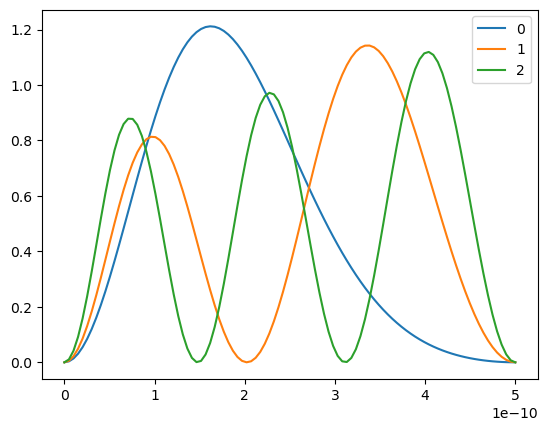

In [4]:
from pylab import *
from math import pi
from numpy import empty,sin,arange, linspace
from numpy.linalg import eigvalsh, eigh

L = 5e-10
hbar = 1.0546e-34
M = 9.1094e-31
q = 1.6022e-19
a = 10*q


def H(m,n):
	
	s = 0
	#m+=1
	#n+=1
	if m==n:
		s+= ((hbar*pi*n)**2)/8/M + a/2*L**2/4
	
	if (m+n)%2==1:
		s+= -(2*L/pi)**2 * m*n/(m**2 - n**2)**2 * a/2
	
	return s
	
def Hp(m,n):
	
	s=0
	
	if m==n:
		s+= hbar**2/8/M*pi**2*n**2
	
	def I(m,n):
		
		if m==n:
			return L**2/4
		elif (m+n)%2 == 1:
			return -(2*L/pi)**2* m*n/(m**2-n**2)**2
		else:
			return 0
	
	s += a/2*I(m,n)
	return s

# Calculating the matrix
N = 100
A = empty((N,N),float)
for i in range(N):
	for j in range(N):
		A[i,j] = Hp(i+1,j+1)
		
X,ksi = eigh(A)
print(X[:10])

def wavefunction(x,m=1):
	n = arange(1,N+1)
	s = sum(ksi[:,m]*sin(pi*n*x/L))
	return s**2

x = linspace(0,L,100)

for i in range(3):
	ksi_i = [wavefunction(xi,m=i) for xi in x]
	plot(x,ksi_i,label=i)
legend()